# Exploratory Data Analysis (EDA) & Feature Engineering  
## Flight Fare Trend Tracker & Predictor

This notebook performs exploratory data analysis and feature engineering on
flight fare data generated through a web scraping pipeline.
The objective is to understand pricing patterns and prepare the data
for time series forecasting.


## Data Source

The dataset used in this notebook was generated using a simulated web scraping
pipeline, as demonstrated in the `Web_Scraping_and_Dataset_Generation.ipynb`
notebook. The data represents daily observed flight fares across multiple
routes and airlines.


## 1. Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

## 2. Load Dataset


In [3]:
df = pd.read_csv("../data/flight_fares.csv")
df.head()

,scrape_date,origin,destination,departure_date,airline,price
0,2025-01-01,Mumbai,Delhi,2025-01-15,IndiGo,4536
1,2025-01-02,Mumbai,Delhi,2025-01-16,SpiceJet,4194
2,2025-01-03,Mumbai,Delhi,2025-01-17,Vistara,4503
3,2025-01-04,Mumbai,Delhi,2025-01-18,Air India,5507
4,2025-01-05,Mumbai,Delhi,2025-01-19,Akasa Air,5375


## 3. Dataset Overview


In [4]:
df.shape

(90, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   scrape_date     90 non-null     object
 1   origin          90 non-null     object
 2   destination     90 non-null     object
 3   departure_date  90 non-null     object
 4   airline         90 non-null     object
 5   price           90 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 4.3+ KB


In [6]:
df.describe()

,price
count,90.000000
mean,4941.044444
std,557.011748
min,4044.000000
25%,4493.750000
50%,5012.000000
75%,5346.000000
max,5997.000000


## 4. Date Conversion


In [7]:
df['scrape_date'] = pd.to_datetime(df['scrape_date'])
df['departure_date'] = pd.to_datetime(df['departure_date'])

## 5. Missing Value Analysis


In [8]:
df.isnull().sum()

scrape_date       0
origin            0
destination       0
departure_date    0
airline           0
price             0
dtype: int64

In [9]:
df.dropna(inplace=True)

## 6. Feature Engineering

Time-based features are extracted from the scrape date to enhance analysis.

In [10]:
df['weekday'] = df['scrape_date'].dt.day_name()
df['month'] = df['scrape_date'].dt.month

## 7. Distribution of Flight Prices

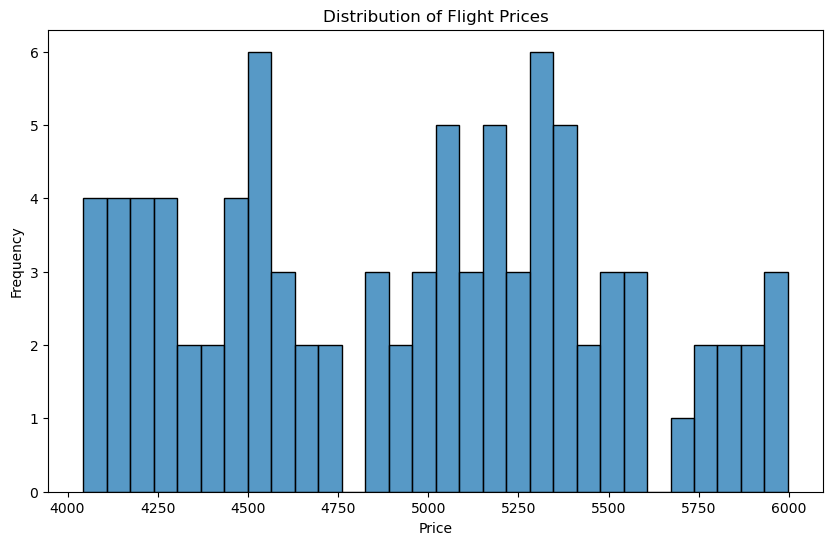

In [11]:
sns.histplot(df['price'], bins=30)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## 8. Flight Fare Trend Over Time

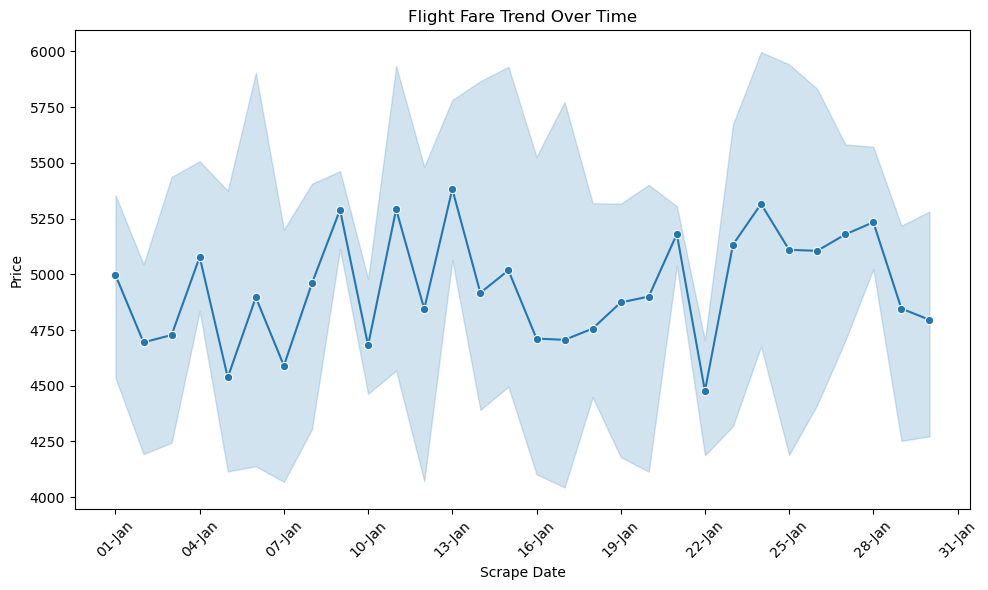

In [12]:
import matplotlib.dates as mdates

sns.lineplot(x='scrape_date', y='price', data=df, marker='o')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

plt.xticks(rotation=45)
plt.title("Flight Fare Trend Over Time")
plt.xlabel("Scrape Date")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

## 9. Airline-wise Price Analysis

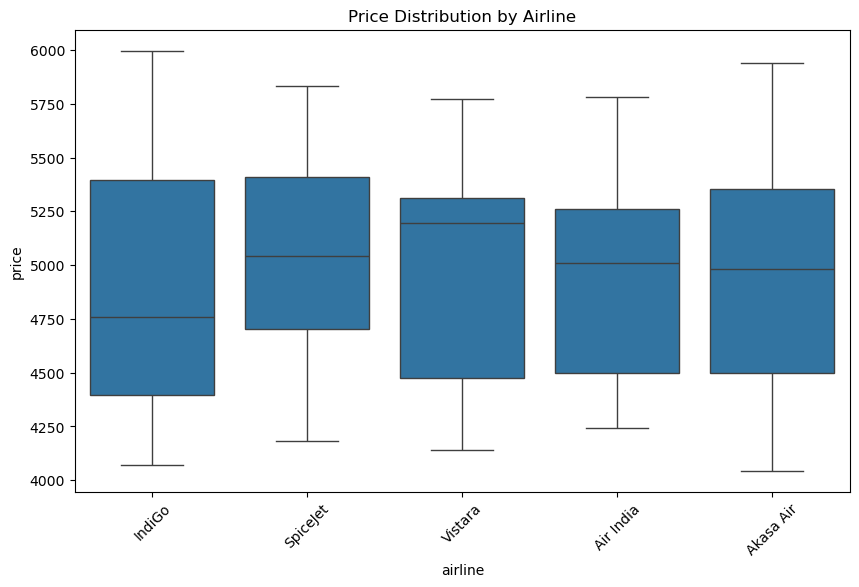

In [13]:
sns.boxplot(x='airline', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Airline")
plt.show()

## 10. Price Variation by Weekday

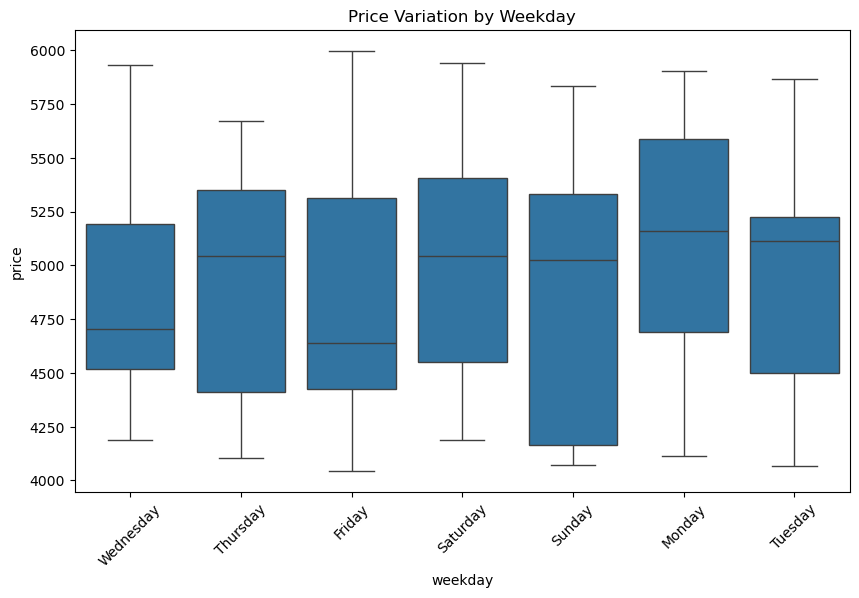

In [14]:
sns.boxplot(x='weekday', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price Variation by Weekday")
plt.show()

## 11. Route-wise Price Analysis

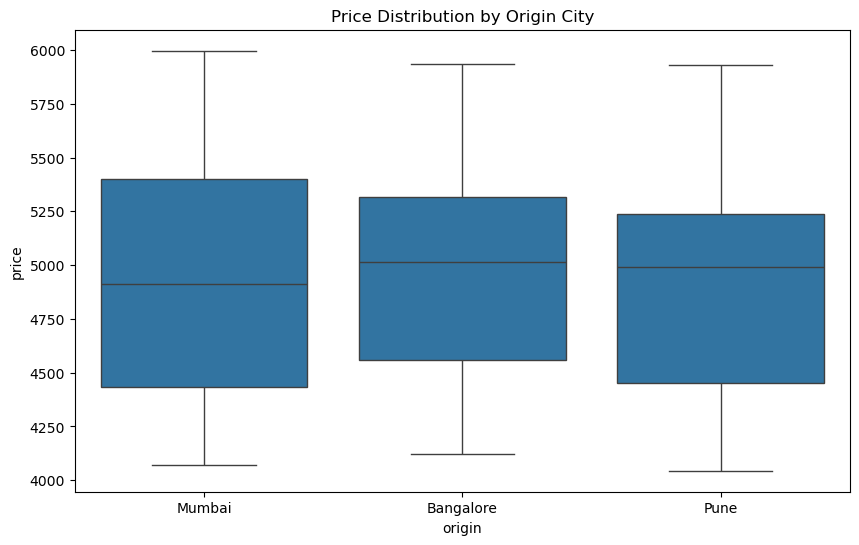

In [15]:
sns.boxplot(x='origin', y='price', data=df)
plt.title("Price Distribution by Origin City")
plt.show()

## 12. Outlier Detection

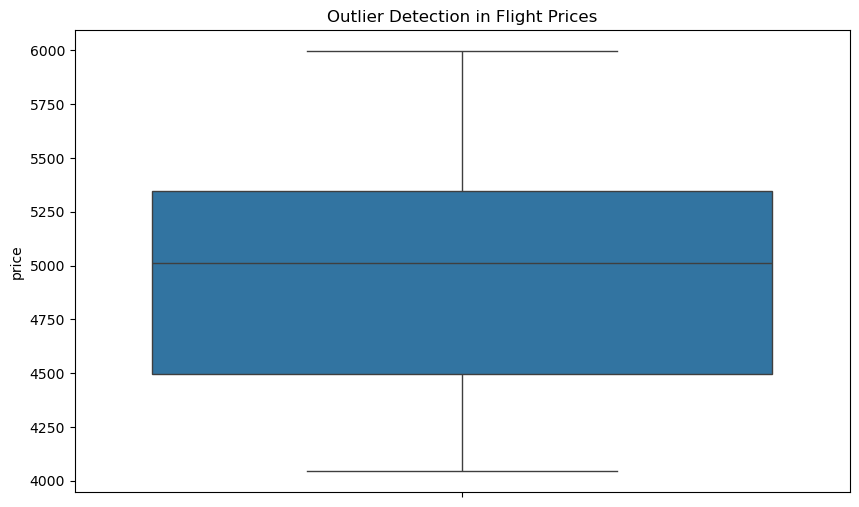

In [16]:
sns.boxplot(y=df['price'])
plt.title("Outlier Detection in Flight Prices")
plt.show()

## 13. Final Dataset Preview

In [17]:
df.head()

,scrape_date,origin,destination,departure_date,airline,price,weekday,month
0,2025-01-01,Mumbai,Delhi,2025-01-15,IndiGo,4536,Wednesday,1
1,2025-01-02,Mumbai,Delhi,2025-01-16,SpiceJet,4194,Thursday,1
2,2025-01-03,Mumbai,Delhi,2025-01-17,Vistara,4503,Friday,1
3,2025-01-04,Mumbai,Delhi,2025-01-18,Air India,5507,Saturday,1
4,2025-01-05,Mumbai,Delhi,2025-01-19,Akasa Air,5375,Sunday,1


## 14. Save Cleaned Dataset

In [18]:
df.to_csv("../data/cleaned_flight_fares.csv", index=False)

## 15. Conclusion

EDA revealed significant variability in flight fares influenced by airline,
route, and temporal factors. Feature engineering enriched the dataset with
useful time-based attributes, preparing it for time series forecasting.